## DIA 010: Introduccion a las Redes Neurales

¿Qué es una Red Neuronal?
Las redes neuronales son una clase de modelos de aprendizaje automático inspirados en el funcionamiento del cerebro humano. Están compuestas por capas de neuronas artificiales que procesan la información mediante conexiones ponderadas. Son especialmente efectivas para tareas como clasificación, regresión, reconocimiento de imágenes, procesamiento de lenguaje natural, entre otras.

Componentes Clave de una Red Neuronal:
- Neuronas (o nodos): Unidades básicas que reciben entradas, las procesan y generan salidas.
- Capas:
    - Capa de Entrada: Recibe los datos iniciales.
    - Capas Ocultas: Procesan la información intermedia.
    - Capa de Salida: Genera el resultado final.
- Pesos y Biases: Parámetros que la red ajusta durante el entrenamiento para minimizar el error.
- Función de Activación: Introduce no linealidad en el modelo, permitiendo aprender relaciones complejas.

¿Qué es TensorFlow?
TensorFlow es una biblioteca de código abierto desarrollada por Google para realizar cálculos numéricos utilizando flujos de datos. Es ampliamente utilizada para construir y entrenar modelos de aprendizaje profundo (deep learning).

¿Qué es Keras?
Keras es una API de alto nivel para redes neuronales, escrita en Python y capaz de ejecutarse sobre TensorFlow, Theano o CNTK. Facilita la creación rápida y sencilla de modelos de aprendizaje profundo.

In [1]:
# 1. Importacion de librerias
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2. Carga y Preprocesamiento de Datos
# Cargar el dataset MNIST
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar los valores de píxeles de 0-255 a 0-1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Verificar la forma de los datos
print("Forma de X_train:", X_train.shape)  # (60000, 28, 28)
print("Forma de y_train:", y_train.shape)  # (60000,)
print("Forma de X_test:", X_test.shape)    # (10000, 28, 28)
print("Forma de y_test:", y_test.shape)    # (10000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 82s 7us/step
Forma de X_train: (60000, 28, 28)
Forma de y_train: (60000,)
Forma de X_test: (10000, 28, 28)
Forma de y_test: (10000,)


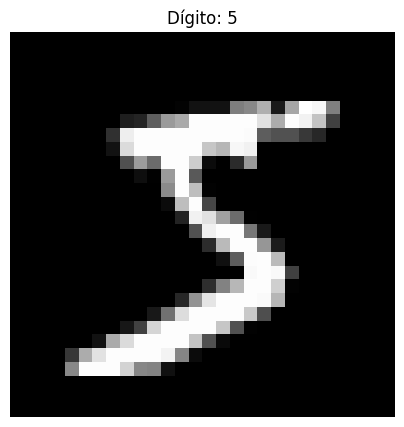

In [3]:
# 3. Visualizacion de Datos
# Función para visualizar imágenes
def mostrar_imagenes(matriz, etiquetas, indice):
    plt.figure(figsize=(5,5))
    plt.imshow(matriz[indice], cmap='gray')
    plt.title(f"Dígito: {etiquetas[indice]}")
    plt.axis('off')
    plt.show()

# Mostrar el primer dígito del conjunto de entrenamiento
mostrar_imagenes(X_train, y_train, 0)

In [4]:
# 4. Contruccion del Modelo
# Crear el modelo usando la API Sequential de Keras
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Convertir la matriz 28x28 en un vector de 784 elementos
    layers.Dense(128, activation='relu'),  # Capa densa con 128 neuronas y función de activación ReLU
    layers.Dropout(0.2),                   # Regularización para prevenir overfitting
    layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por dígito) y softmax
])

# Resumen del modelo
model.summary()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 5. Complicacion del Modelo
# Compilar el modelo definiendo el optimizador, la función de pérdida y las métricas
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# 6. Entrenamiento del Modelo
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8600 - loss: 0.4776 - val_accuracy: 0.9572 - val_loss: 0.1408
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9567 - loss: 0.1513 - val_accuracy: 0.9676 - val_loss: 0.1022
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9662 - loss: 0.1140 - val_accuracy: 0.9736 - val_loss: 0.0871
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9724 - loss: 0.0888 - val_accuracy: 0.9765 - val_loss: 0.0772
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9775 - loss: 0.0732 - val_accuracy: 0.9762 - val_loss: 0.0827
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9800 - loss: 0.0625 - val_accuracy: 0.9784 - val_loss: 0.0743
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9818 - loss: 0.0551 - val_accuracy: 0.9791 - val_loss: 0.0668
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9828 - loss: 0.0521 - 

In [7]:
# 7. Evaluacion del Modelo
# Evaluar el rendimiento en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

313/313 - 0s - 758us/step - accuracy: 0.9805 - loss: 0.0723

Precisión en el conjunto de prueba: 0.9805


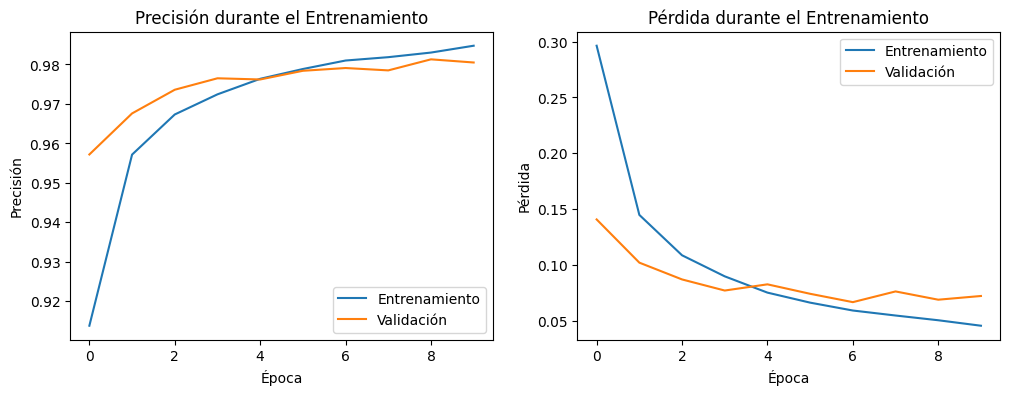

In [8]:
# 8. Visualizacion del Rendimiento del Modelo
# Graficar precisión y pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [9]:
# 9. Guardado y Carga del Modelo
# Guardar el modelo completo en un archivo H5
model.save('modelo_mnist.h5')
print("Modelo guardado como 'modelo_mnist.h5'")

# Cargar el modelo guardado
nuevo_modelo = tf.keras.models.load_model('modelo_mnist.h5')
print("Modelo cargado exitosamente.")

Modelo guardado como 'modelo_mnist.h5'
Modelo cargado exitosamente.


In [10]:
# 10. Hacer Predicciones con el Modelo Cargado
# Hacer predicciones sobre el conjunto de prueba
predicciones = nuevo_modelo.predict(X_test)

# Mostrar predicción para la primera imagen del conjunto de prueba
indice = 0
print(f"Etiqueta real: {y_test[indice]}")
print(f"Predicción: {np.argmax(predicciones[indice])}")
print(f"Probabilidades: {predicciones[indice]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
Etiqueta real: 7
Predicción: 7
Probabilidades: [3.0704264e-09 9.2258430e-11 1.0886045e-08 8.9880513e-07 2.7586967e-14
 1.7584622e-09 1.5356325e-15 9.9999869e-01 7.1433961e-09 3.4587481e-07]
